In [1]:
config_path = './results/concentricN_artifical_10mm_at_5mm/config.yaml'
# this file is for creating aperture array
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import src.ASM as ASM
import src.math_tool as mt
import src.img_tool as it
from PIL import Image
import os
import yaml
from box import Box
%load_ext autoreload
%autoreload 2
%matplotlib ipympl
time_string = datetime.now().isoformat(timespec='minutes')
################################################## all code in unit of μm
config = None
with open(config_path, 'r') as f:
    config = Box(yaml.safe_load(f))
x_start, x_end, y_start, y_end, z_start, z_end = tuple(config.simulation.range)
Lx, Ly, Lz = x_end - x_start, y_end - y_start, z_end - z_start
Nx_ticks, Ny_ticks, Nz_ticks = tuple(config.plot.N_ticks) 
s_res = config.simulation.resolution
Nx, Ny, Nz = eval(s_res[0]), eval(s_res[1]), eval(s_res[2]) # manufactured aperture have resolution of 1000 * 1000
xs, ys, zs = np.linspace(x_start, x_end, Nx, endpoint=False), np.linspace(y_start, y_end, Ny, endpoint=False), np.linspace(z_start, z_end, Nz, endpoint=False)
x_ticks, x_ticks_val, y_ticks, y_ticks_val, z_ticks, z_ticks_val = np.arange(0, Nx, Nx/Nx_ticks), np.round(xs[::Nx//Nx_ticks], decimals=config.plot.dp), np.arange(0, Ny, Ny/Ny_ticks), np.round(ys[::Ny//Ny_ticks], decimals=config.plot.dp), np.arange(0, Nz, Nz/Nz_ticks), np.round(zs[::Nz//Nz_ticks], decimals=config.plot.dp)

In [ ]:
# image to array
# A_xy = it.img_2_2Darray('img/hohonming.png', Nx, Ny)

In [2]:
# analytical func to aray
import src.apertures as apertures
A = getattr(apertures, config.aperture.func)
A_xy = mt.func_2_arr(A, Nx, Ny, Lx, Ly)

saved in ./results/concentricN_artifical_10mm_at_5mm


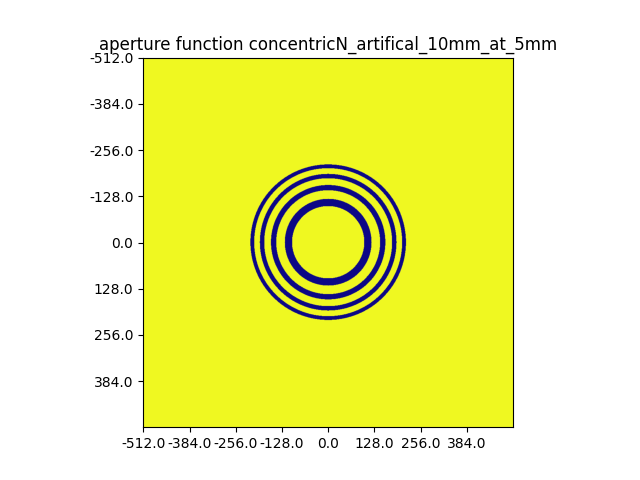

In [3]:
path =
save_path = 
# i = os.system(f'mkdir {path}')
# if i == 256:
#     print('file name already exist')
#     exit() # protect from overwrite an existing file
if (A_xy > 1).any() or (A_xy < 0).any(): # sanity check
    print('error with aperture function')
    exit()
np.save(f'{save_path}/A.npy', A_xy)
plt.cla()
plt.imshow(A_xy.T, cmap='plasma')
plt.xticks(x_ticks, x_ticks_val)
plt.yticks(y_ticks, y_ticks_val)
plt.title(f'aperture function {config.aperture.name}')
plt.savefig(f'{save_path}/A.png')
print(f'saved in {save_path}')